In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
cars = pd.read_csv('ML_cars.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [61]:
from sklearn.preprocessing import LabelEncoder
le_fueltype = LabelEncoder()
cars['fueltype']= le_fueltype.fit_transform(cars['fueltype'])

le_aspiration = LabelEncoder()
cars['aspiration']= le_aspiration.fit_transform(cars['aspiration'])

cars['doornumber'] = cars['doornumber'].replace({'two': 2, 'four': 4})

le_carbody = LabelEncoder()
cars['carbody'] = le_carbody.fit_transform(cars['carbody'])

le_enginetype = LabelEncoder()
cars['enginetype'] = le_enginetype.fit_transform(cars['enginetype'])

le_fuelsystem = LabelEncoder()
cars['fuelsystem'] = le_fuelsystem.fit_transform(cars['fuelsystem'])

In [62]:
cylinder_mapping = {
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}
cars['cylindernumber'] = cars['cylindernumber'].map(cylinder_mapping)

In [63]:
cars.drop(columns=['CarName','drivewheel','enginelocation','car_ID'], inplace=True)

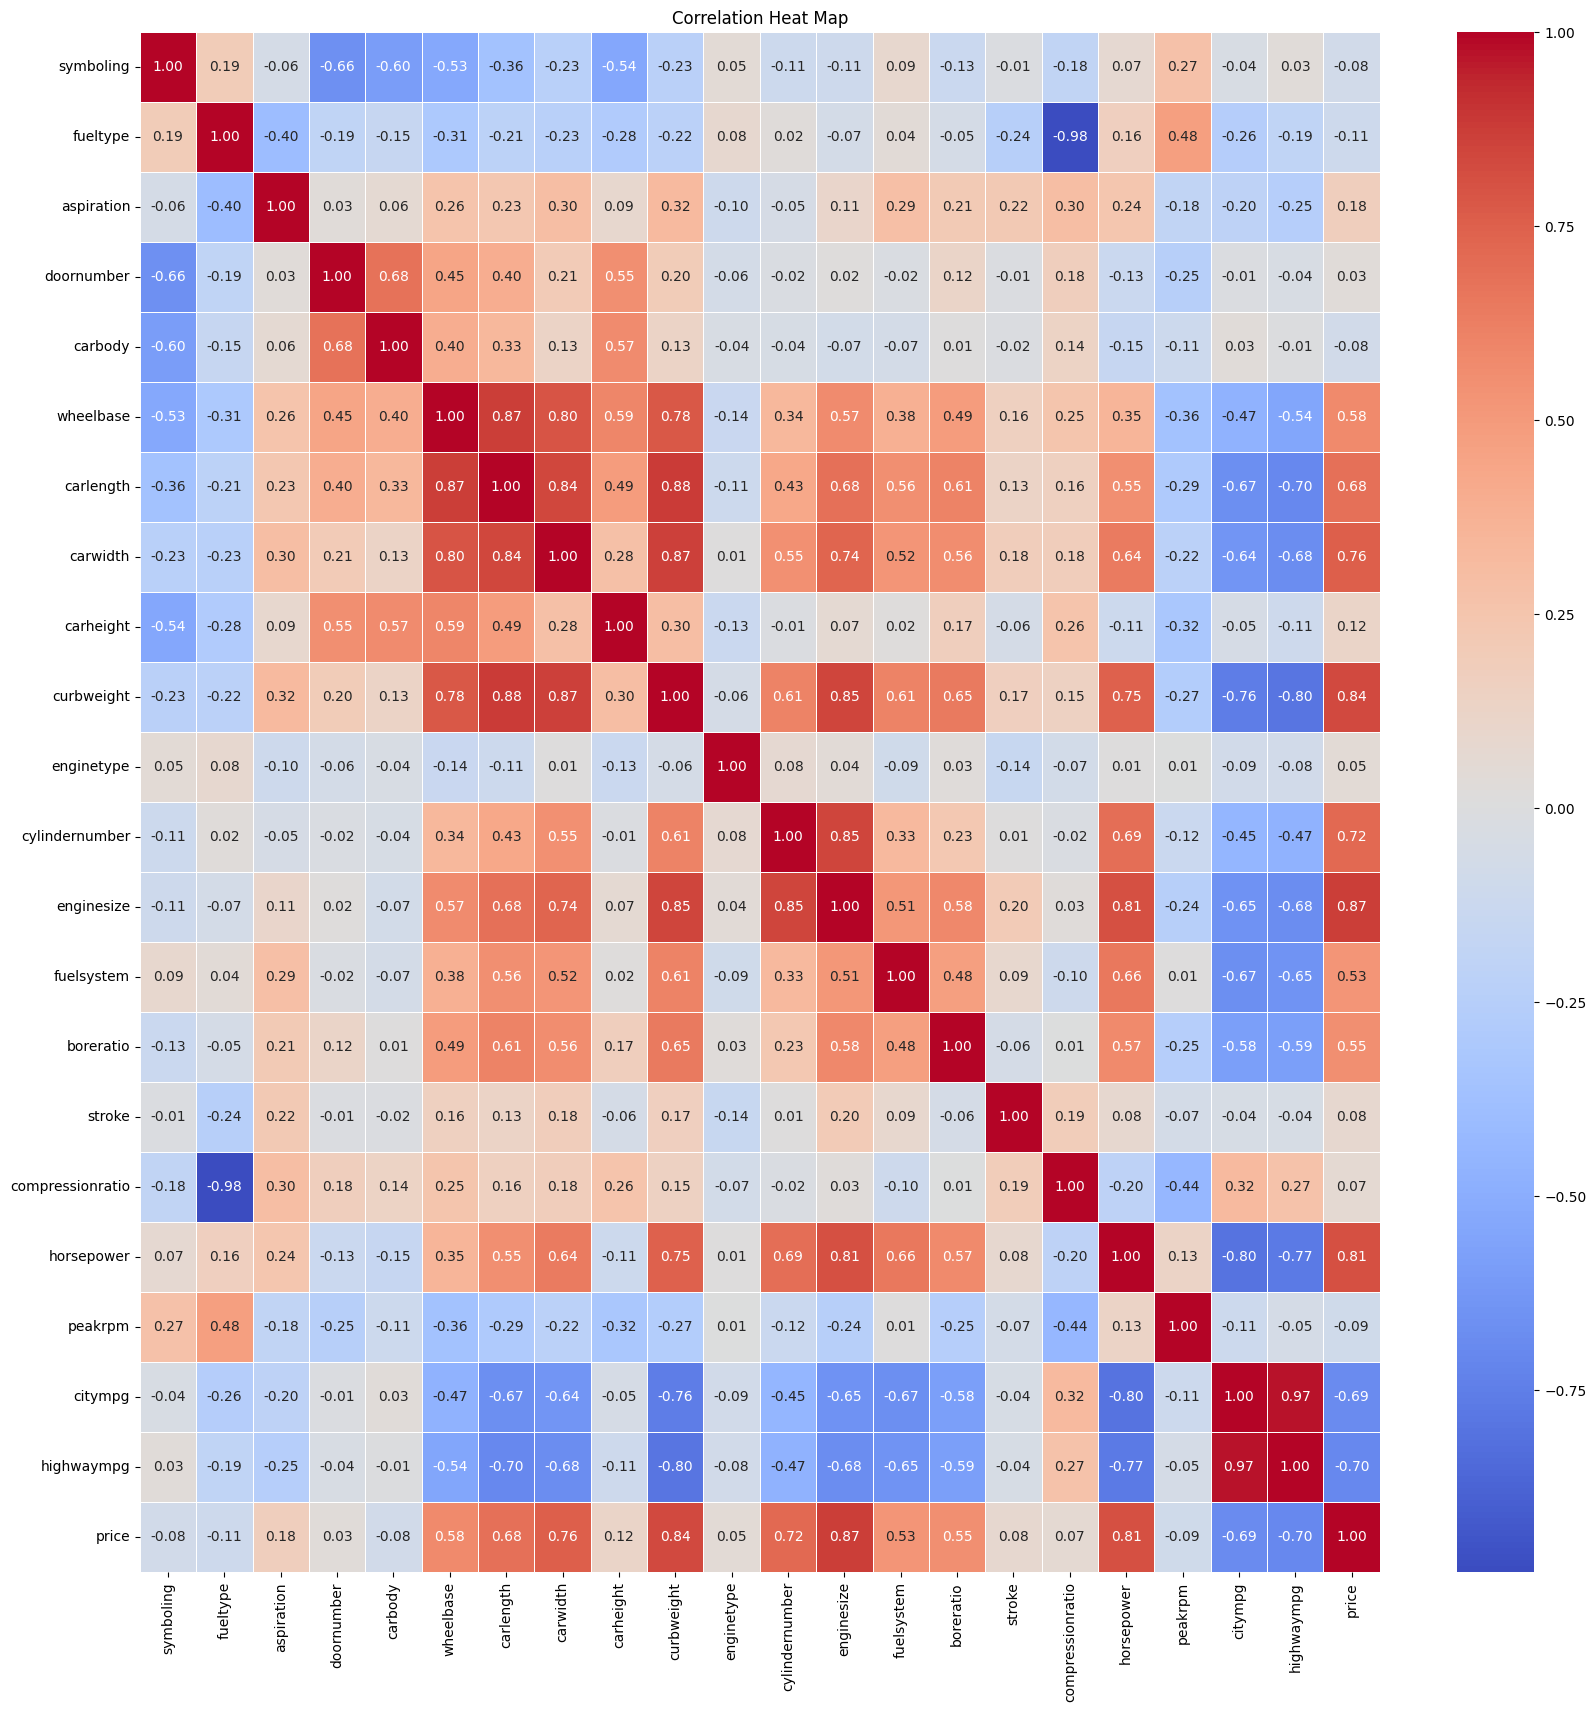

In [64]:
correlation_matrix = cars.corr()

# Create a heat map
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heat Map")
plt.show()

In [65]:
cars.drop(columns=['wheelbase', 'cylindernumber', 'highwaympg'], inplace=True)

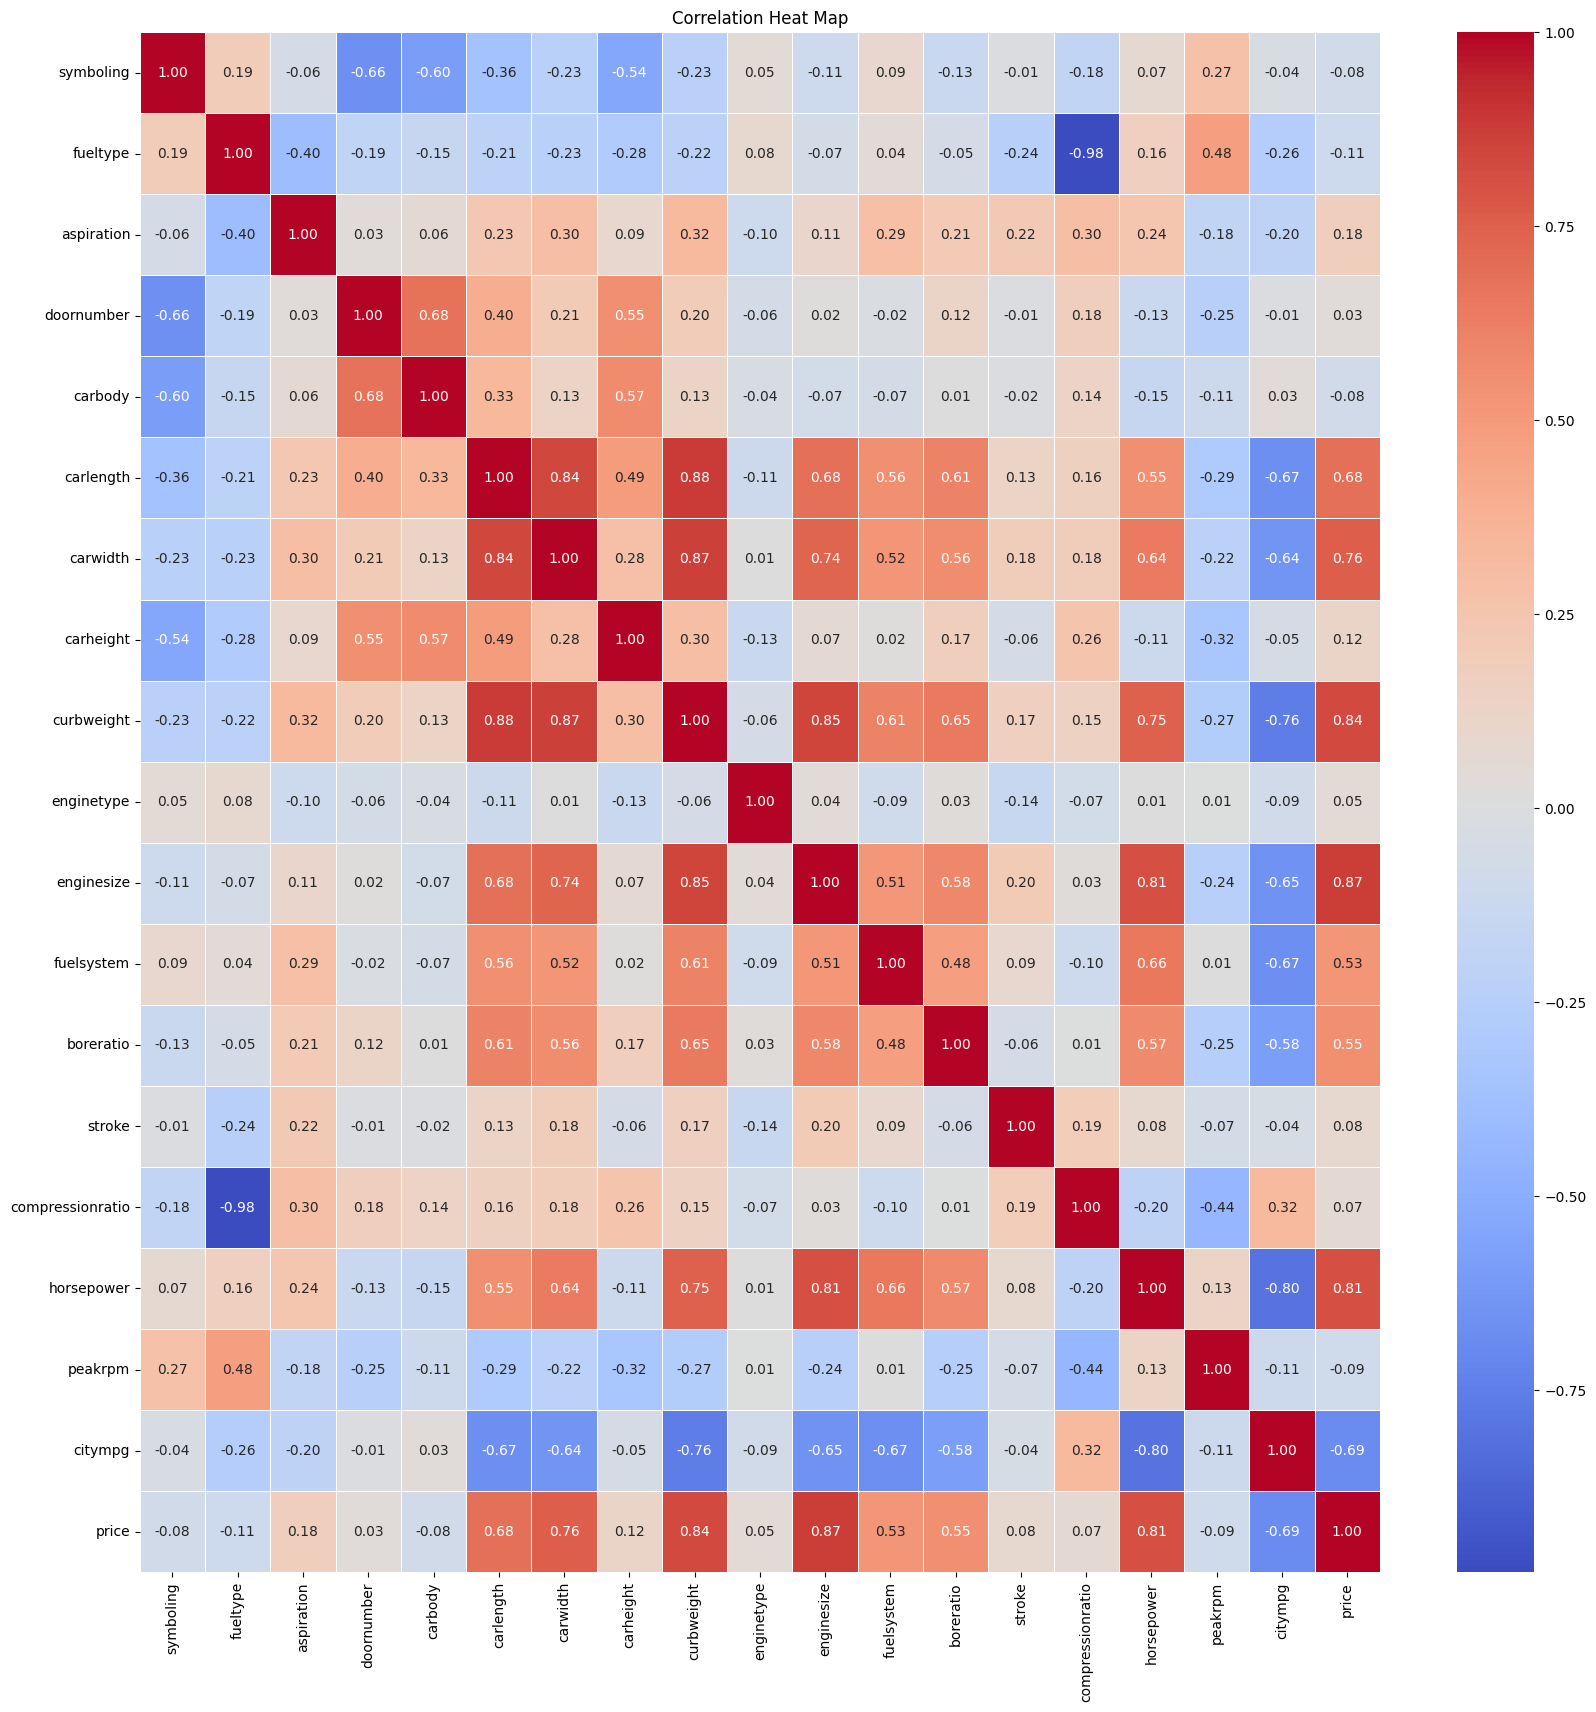

In [66]:
correlation_matrix = cars.corr()

# Create a heat map
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heat Map")
plt.show()

In [67]:
cars.drop(columns=['carlength'], inplace=True)

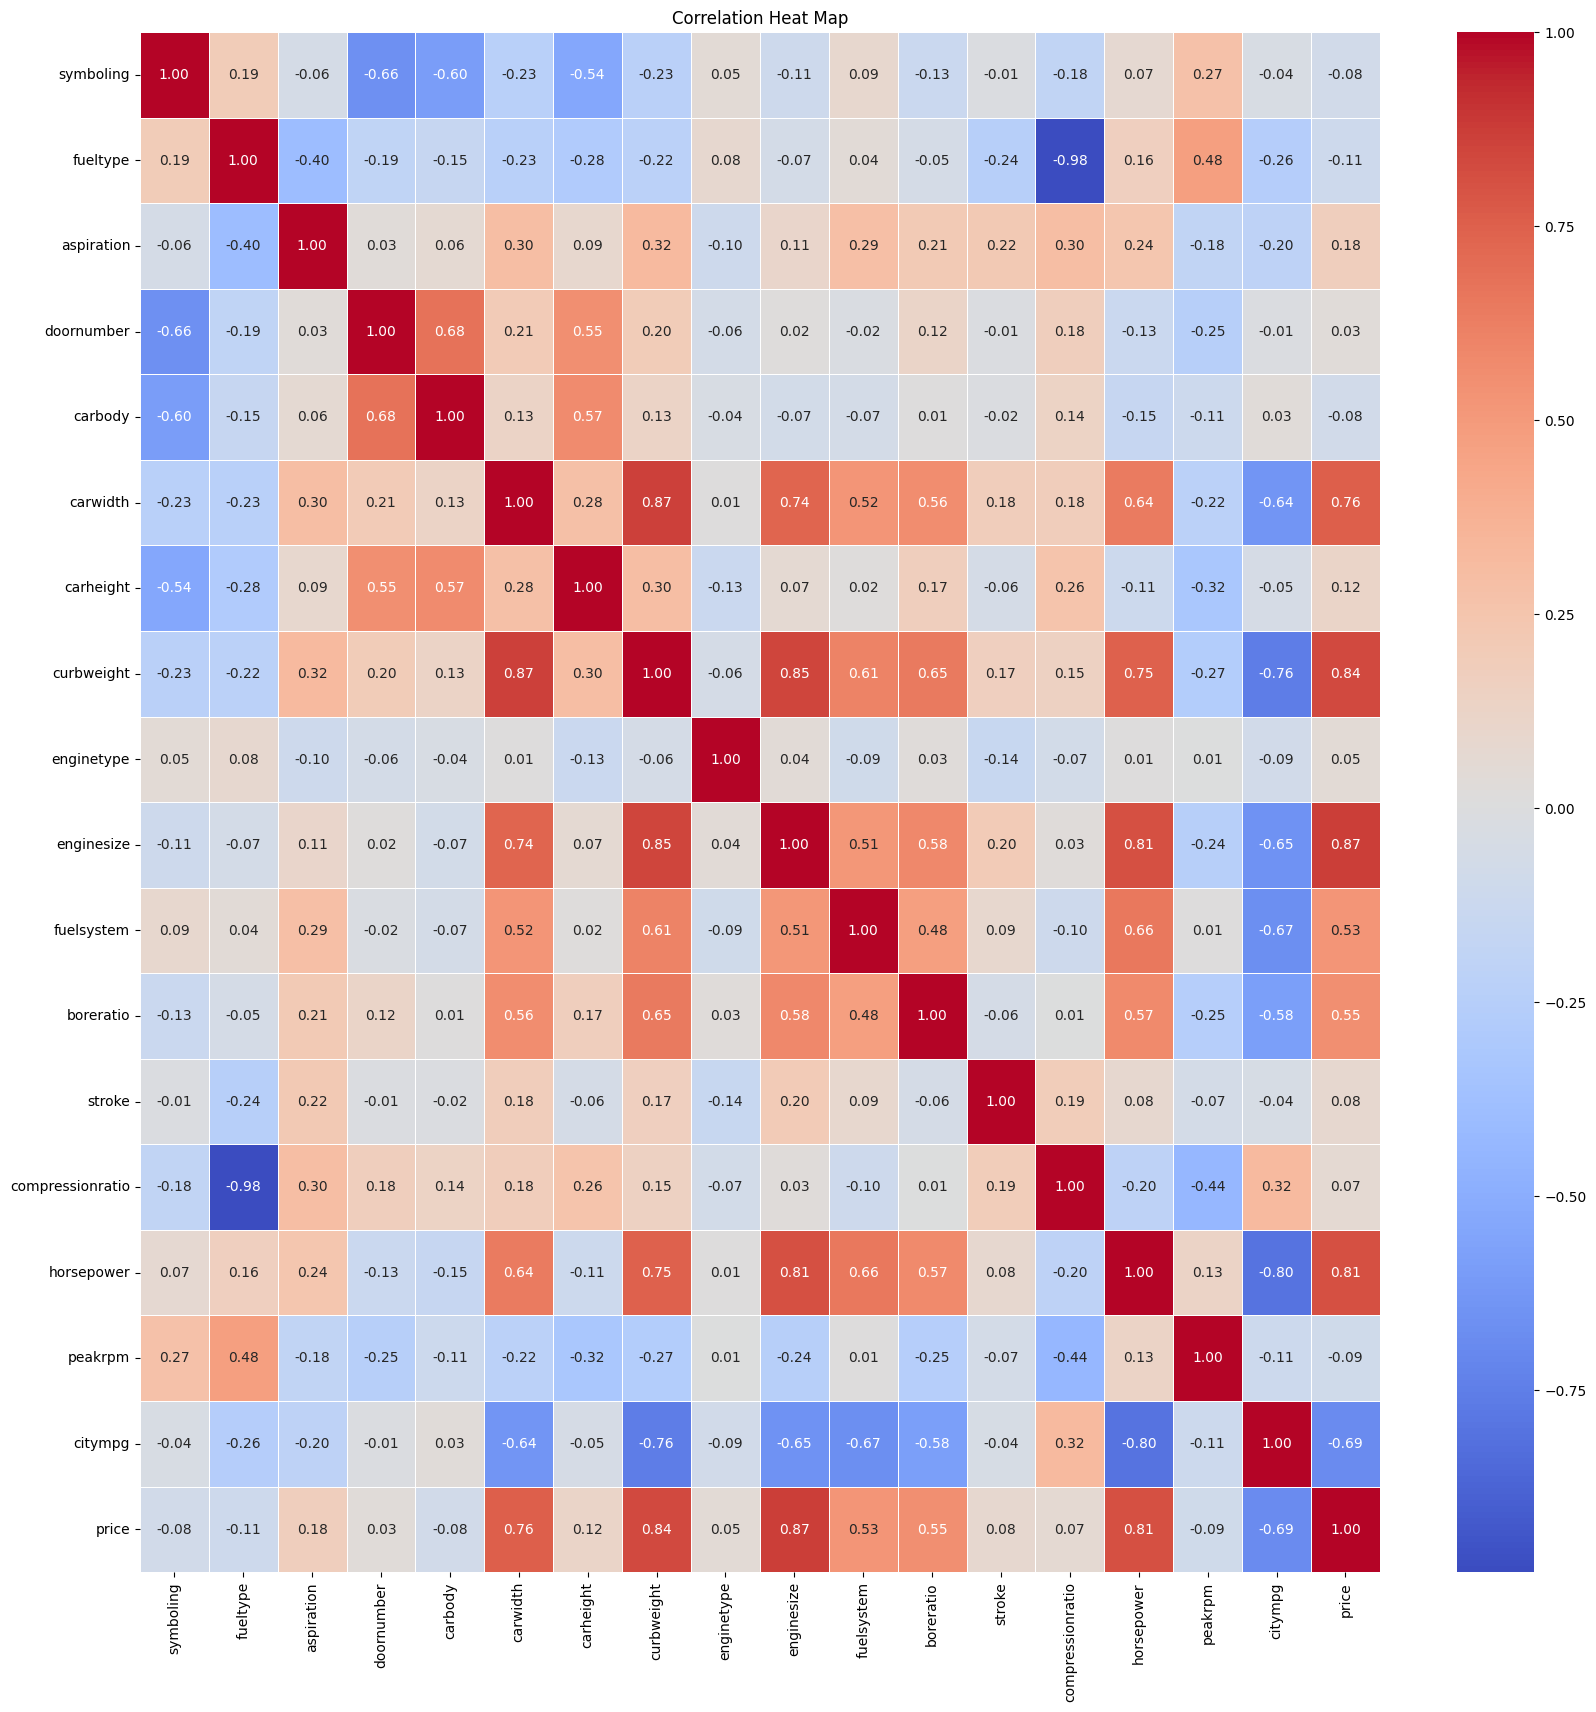

In [68]:
correlation_matrix = cars.corr()

# Create a heat map
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heat Map")
plt.show()

In [69]:
x = cars.drop(columns=['price']).values
y = cars['price'].values

In [70]:
from sklearn.model_selection import train_test_split

x_train_cars,x_test_cars,y_train_cars,y_test_cars = train_test_split(x,y, test_size=0.3, random_state=45)

In [71]:
# Regularización Lasso
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
reg_lasso = Lasso(alpha = 0.001)
reg_lasso.fit(x_train_cars,y_train_cars)

print(reg_lasso.coef_, reg_lasso.intercept_)
y_train_pred_lasso = reg_lasso.predict(x_train_cars)
y_test_pred_lasso = reg_lasso.predict(x_test_cars)

[ 2.87298544e+02 -1.52820880e+04 -9.77170919e+02  4.01143940e+02
 -1.21555816e+03  4.37092020e+02  2.85654509e+02  3.04274547e+00
  1.32373549e+01  9.80114059e+01 -2.86351353e+02 -3.30248285e+02
 -2.69967172e+03 -8.65108918e+02  4.72861774e+01  2.82639243e+00
 -5.94123832e-01] -35216.06028791047


c:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.526e+08, tolerance: 1.005e+06
  model = cd_fast.enet_coordinate_descent(


In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluar_regresion(model, dataframe, y_col, test_size=0.2, random_state=None):
    # Extrae la columna 'y' del DataFrame como variable dependiente
    y = dataframe[y_col]

    # Extrae todas las demás columnas como variables independientes (X)
    X = dataframe.drop(y_col, axis=1)

    # Divide los datos en conjuntos de entrenamiento y prueba
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Entrena el modelo
    
    model.fit(X_train, y_train)

    # Predice los valores en el conjunto de entrenamiento y prueba
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcula el error cuadrático medio
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    # Grafica los resultados
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.scatter(y_train, y_train_pred, s=2, label='Entrenamiento')
    plt.scatter(y_test, y_test_pred, s=2, label='Prueba')
    plt.xlabel(f'{y_col} real')
    plt.ylabel(f'{y_col} predicho')
    plt.legend()

    plt.subplot(1, 3, 2)
    sns.distplot(y_train - y_train_pred, bins=20, label='Entrenamiento')
    sns.distplot(y_test - y_test_pred, bins=20, label='Prueba')
    plt.xlabel('Errores')
    plt.legend()

    ax = plt.subplot(1, 3, 3)
    ax.scatter(y_test, y_test_pred, s=2)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel(f'{y_col} real (Prueba)')
    plt.ylabel(f'{y_col} predicho (Prueba)')

    plt.tight_layout()

    
    plt.show()

# Uso de la función
# Supongamos que tienes un DataFrame llamado 'data' con 19 columnas, donde 'y' es la variable objetivo.
# Llama a la función de la siguiente manera para usar todas las columnas excepto 'y' como variables independientes:
# evaluar_regresion(modelo, data, 'y')

c:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.458e+08, tolerance: 9.758e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Win10\AppData\Local\Temp\ipykernel_11900\4069559489.py:39: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins=20, label='Entrenamiento')
C:\Users\Win10\AppData\Local\Temp\ipykernel_11900\4069559489.py:40: UserWarning: 

`distplot` is

Raíz del error cuadrático medio en Train: 2807.3222662393864
Raíz del error cuadrático medio en Test: 3790.7658288380385


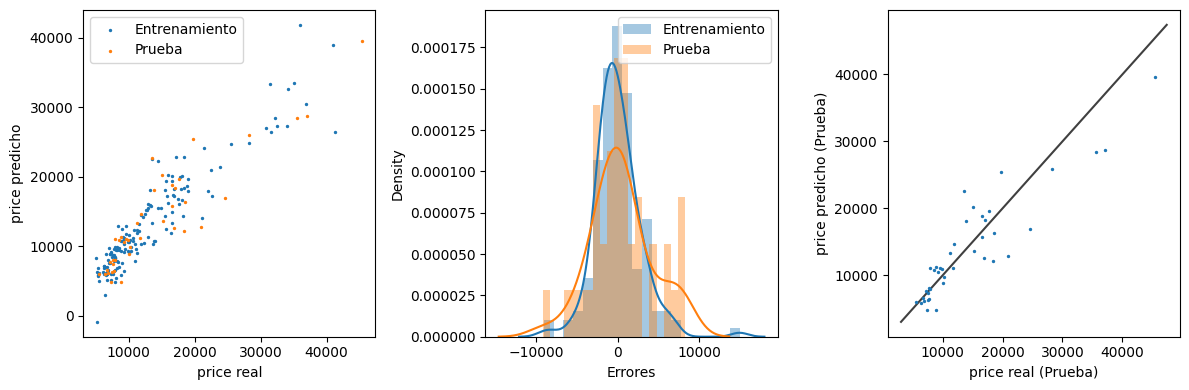

In [73]:
evaluar_regresion(reg_lasso, cars, 'price')

In [74]:

# Calcular MSE, RMSE, MAE y R^2 para el conjunto de entrenamiento
mse_train = mean_squared_error(y_train_cars, y_train_pred_lasso)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train_cars, y_train_pred_lasso)
r2_train = r2_score(y_train_cars, y_train_pred_lasso)

# Calcular MSE, RMSE, MAE y R^2 para el conjunto de prueba
mse_test = mean_squared_error(y_test_cars, y_test_pred_lasso)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_cars, y_test_pred_lasso)
r2_test = r2_score(y_test_cars, y_test_pred_lasso)

# Imprimir los resultados
print(f'MSE (train): {mse_train}')
print(f'RMSE (train): {rmse_train}')
print(f'MAE (train): {mae_train}')
print(f'R^2 (train): {r2_train}')
print(f'MSE (test): {mse_test}')
print(f'RMSE (test): {rmse_test}')
print(f'MAE (test): {mae_test}')
print(f'R^2 (test): {r2_test}')

MSE (train): 10129155.95809542
RMSE (train): 3182.6334941515684
MAE (train): 2325.94447101031
R^2 (train): 0.8558729051164424
MSE (test): 6948444.8654288845
RMSE (test): 2635.9903007084235
MAE (test): 2128.8988175758395
R^2 (test): 0.8525374884574849


In [75]:
cars1 = cars[['horsepower', 'carwidth', 'curbweight', 'enginesize', 'price']]

In [76]:
x1 = cars1.drop(columns=['price']).values
y1 = cars1['price'].values

In [77]:

x_train_cars1,x_test_cars1,y_train_cars1,y_test_cars1 = train_test_split(x1,y1, test_size=0.3, random_state=45)

In [78]:
# Regularización Lasso
from sklearn.linear_model import Lasso
reg_lasso1 = Lasso(alpha = 0.00001)
reg_lasso1.fit(x_train_cars1,y_train_cars1)

print(reg_lasso1.coef_, reg_lasso1.intercept_)
y_train_pred_lasso1 = reg_lasso1.predict(x_train_cars1)
y_test_pred_lasso1 = reg_lasso1.predict(x_test_cars1)

[ 58.93718055 440.48588207   2.73004531  76.35429902] -38449.190996444


Raíz del error cuadrático medio en Train: 3482.084432270647
Raíz del error cuadrático medio en Test: 2993.235949997218


C:\Users\Win10\AppData\Local\Temp\ipykernel_11900\4069559489.py:39: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins=20, label='Entrenamiento')
C:\Users\Win10\AppData\Local\Temp\ipykernel_11900\4069559489.py:40: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_t

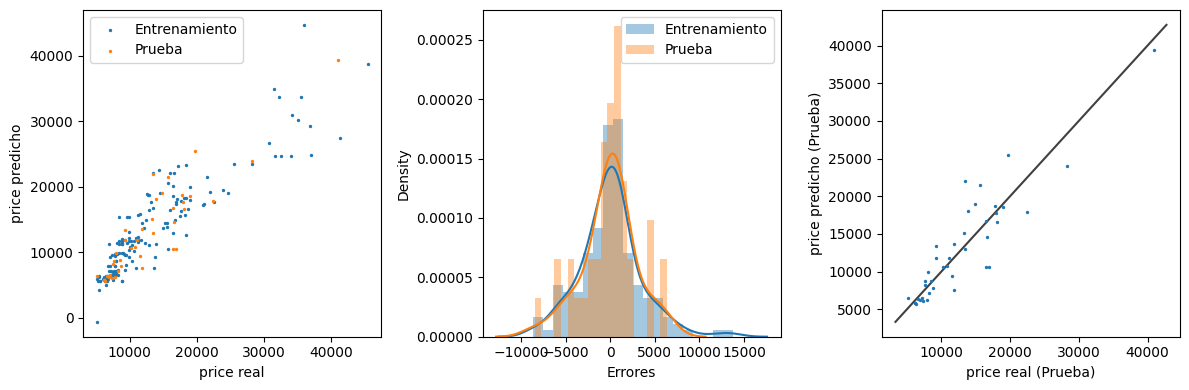

In [79]:
evaluar_regresion(reg_lasso1, cars1, 'price')

In [80]:

# Calcular MSE, RMSE, MAE y R^2 para el conjunto de entrenamiento
mse_train = mean_squared_error(y_train_cars1, y_train_pred_lasso1)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train_cars1, y_train_pred_lasso1)
r2_train = r2_score(y_train_cars1, y_train_pred_lasso1)

# Calcular MSE, RMSE, MAE y R^2 para el conjunto de prueba
mse_test = mean_squared_error(y_test_cars1, y_test_pred_lasso1)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_cars1, y_test_pred_lasso1)
r2_test = r2_score(y_test_cars1, y_test_pred_lasso1)

# Imprimir los resultados
print(f'MSE (train): {mse_train}')
print(f'RMSE (train): {rmse_train}')
print(f'MAE (train): {mae_train}')
print(f'R^2 (train): {r2_train}')
print(f'MSE (test): {mse_test}')
print(f'RMSE (test): {rmse_test}')
print(f'MAE (test): {mae_test}')
print(f'R^2 (test): {r2_test}')

MSE (train): 12340362.420407912
RMSE (train): 3512.885198865444
MAE (train): 2428.1464857086753
R^2 (train): 0.8244097935877724
MSE (test): 9659446.651852258
RMSE (test): 3107.965033885075
MAE (test): 2439.577048194554
R^2 (test): 0.795003588431704


menos columnas

cars con PCA

In [81]:
carsPCA = cars.copy()

In [82]:
X = carsPCA.drop(columns=['price']).values
Y = carsPCA['price'].values

In [83]:
x_train_carsPCA,x_test_carsPCA,y_train_carsPCA,y_test_carsPCA = train_test_split(X,Y, test_size=0.3, random_state=45)

In [84]:
def evaluar_regresion_lasso(model, X, y, X_train, X_test, y_train, y_test):
    """
    Función para evaluar y graficar un modelo de regresión de Lasso.
    Args:
        model: El modelo de regresión de Lasso entrenado.
        X: El conjunto completo de características (datos de entrada).
        y: El vector de etiquetas (valores de salida).
        X_train: El conjunto de entrenamiento de características.
        X_test: El conjunto de prueba de características.
        y_train: El vector de etiquetas de entrenamiento.
        y_test: El vector de etiquetas de prueba.
    """
    # Realizar predicciones en los conjuntos de entrenamiento y prueba
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Calcular el error cuadrático medio en los conjuntos de entrenamiento y prueba
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    # Graficar los resultados
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.scatter(X[:, 0], y, s=2, label='Datos')
    plt.plot(X[:, 0], y, '--', label='Curva teórica', c='r')
    # Ordenar los datos para graficar la regresión en el conjunto de entrenamiento
    sort_indices = np.argsort(X_train[:, 0])
    plt.plot(X_train[sort_indices, 0], y_train_pred[sort_indices], label='Regresión (train)')
    # Ordenar los datos para graficar la regresión en el conjunto de prueba
    sort_indices = np.argsort(X_test[:, 0])
    plt.plot(X_test[sort_indices, 0], y_test_pred[sort_indices], label='Regresión (test)')
    plt.xlabel('Dimensión 1')
    plt.ylabel('y')
    plt.legend()
    plt.subplot(1, 3, 2)
    sns.distplot(y_train - y_train_pred, bins=20, label='train')
    sns.distplot(y_test - y_test_pred, bins=20, label='test')
    plt.xlabel('Errores')
    plt.legend()
    ax = plt.subplot(1, 3, 3)
    ax.scatter(y_test, y_test_pred, s=2)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.tight_layout()
    plt.show()

Raíz del error cuadrático medio en Train: 3282.4610817996836
Raíz del error cuadrático medio en Test: 2344.860312393798


c:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
c:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\Win10\AppData\Local\Temp\ipykernel_11900\2677378846.py:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins=20, label='train')
C:\Users\Win10\AppData\Local\Temp\ipykernel_11900\2677378846.py:37: UserWarning: 

`

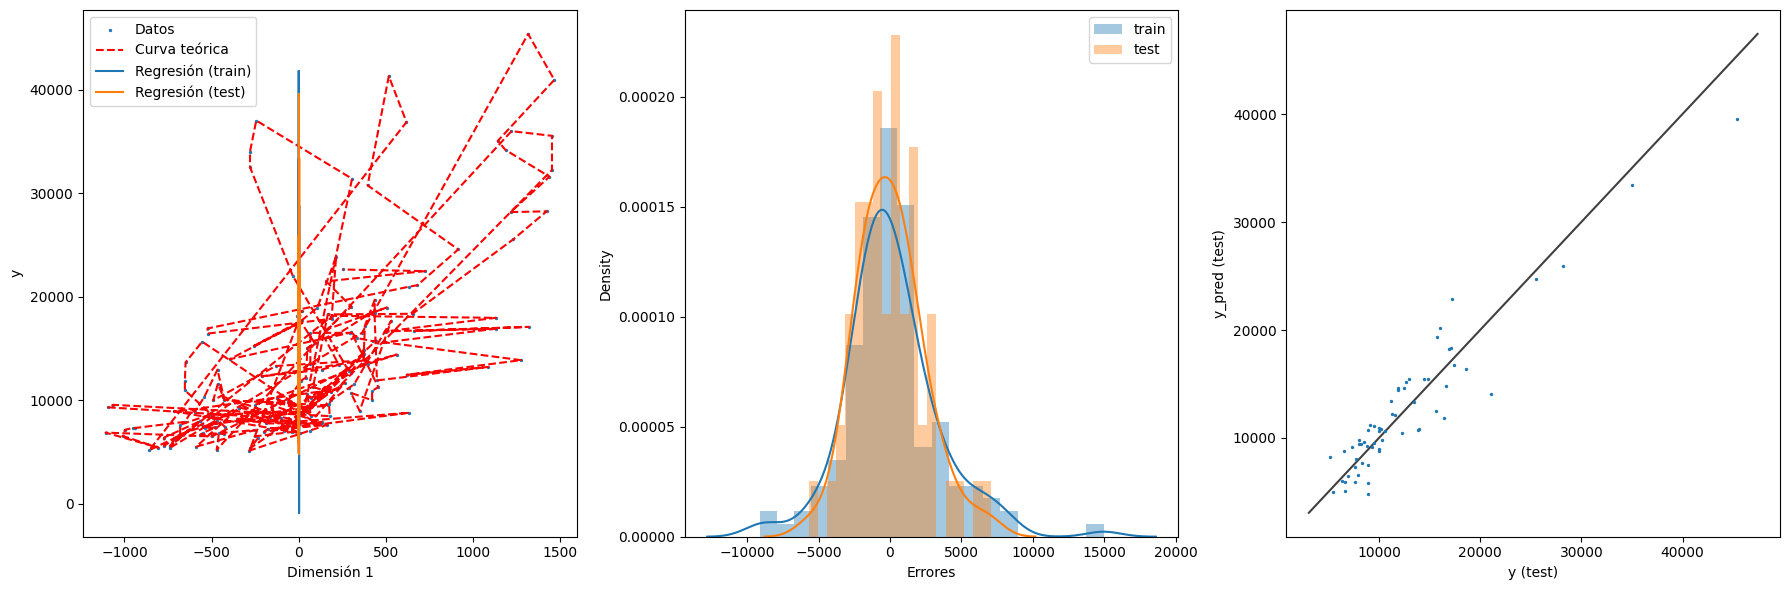

In [85]:
from  sklearn.decomposition  import  PCA #  Aplicar  PCA  para  reducir  la  dimensionalidad 
pca  =  PCA(n_components=8)
X_pca  =  pca.fit_transform(X) #  Entrenar  el  modelo  de  regresión  de  Lasso  con  los  componentes  principales 
reg_lasso1.fit(X_pca,  Y) #  Llamar  a  la  función  de  evaluación  y  graficación 
evaluar_regresion_lasso(reg_lasso,  X_pca,  Y,  x_train_carsPCA,  x_test_carsPCA,  y_train_carsPCA,  y_test_carsPCA) 

c:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.723e+08, tolerance: 9.366e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Win10\AppData\Local\Temp\ipykernel_11900\4069559489.py:39: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins=20, label='Entrenamiento')
C:\Users\Win10\AppData\Local\Temp\ipykernel_11900\4069559489.py:40: UserWarning: 

`distplot` is

Raíz del error cuadrático medio en Train: 2865.84716062282
Raíz del error cuadrático medio en Test: 3665.3511958673353


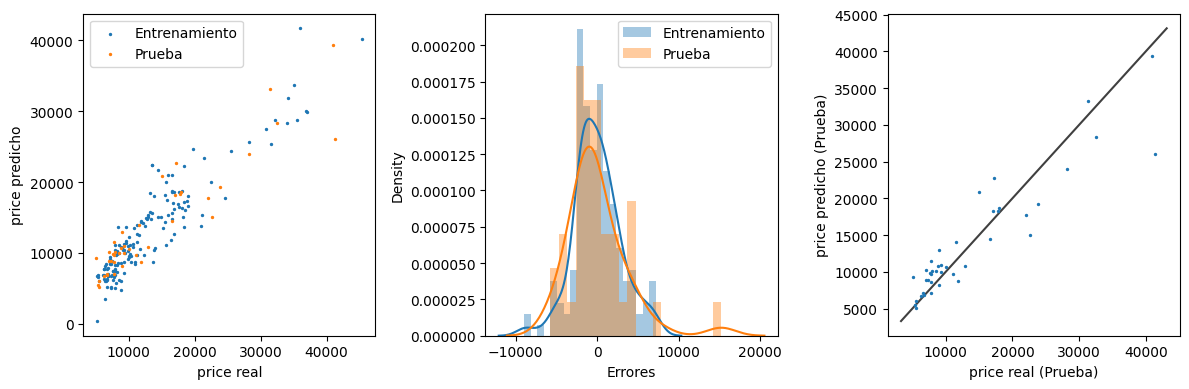

In [86]:
evaluar_regresion(reg_lasso1, carsPCA, 'price')

In [87]:

# Calcular MSE, RMSE, MAE y R^2 para el conjunto de entrenamiento
mse_train = mean_squared_error(y_train_carsPCA, y_train_pred_lasso1)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train_carsPCA, y_train_pred_lasso1)
r2_train = r2_score(y_train_carsPCA, y_train_pred_lasso1)

# Calcular MSE, RMSE, MAE y R^2 para el conjunto de prueba
mse_test = mean_squared_error(y_test_carsPCA, y_test_pred_lasso1)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_carsPCA, y_test_pred_lasso1)
r2_test = r2_score(y_test_carsPCA, y_test_pred_lasso1)

# Imprimir los resultados
print(f'MSE (train): {mse_train}')
print(f'RMSE (train): {rmse_train}')
print(f'MAE (train): {mae_train}')
print(f'R^2 (train): {r2_train}')
print(f'MSE (test): {mse_test}')
print(f'RMSE (test): {rmse_test}')
print(f'MAE (test): {mae_test}')
print(f'R^2 (test): {r2_test}')

MSE (train): 12340362.420407912
RMSE (train): 3512.885198865444
MAE (train): 2428.1464857086753
R^2 (train): 0.8244097935877724
MSE (test): 9659446.651852258
RMSE (test): 3107.965033885075
MAE (test): 2439.577048194554
R^2 (test): 0.795003588431704
